In [3]:
# Loading the imports
import pandas as pd # Data manipulation
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Loading the data
housing = pd.read_csv("housing.csv")
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Viewing all the column names
col_names = housing.columns
col_names

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
# Quick description of the data
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### We can see that the total_bedrooms column has 20433 non-null values meaning there are missing values. The ocean_proximity column is of object data type, let's inspect the column

In [7]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
# Check for the other fields
housing_summary = housing.describe()
housing_summary

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


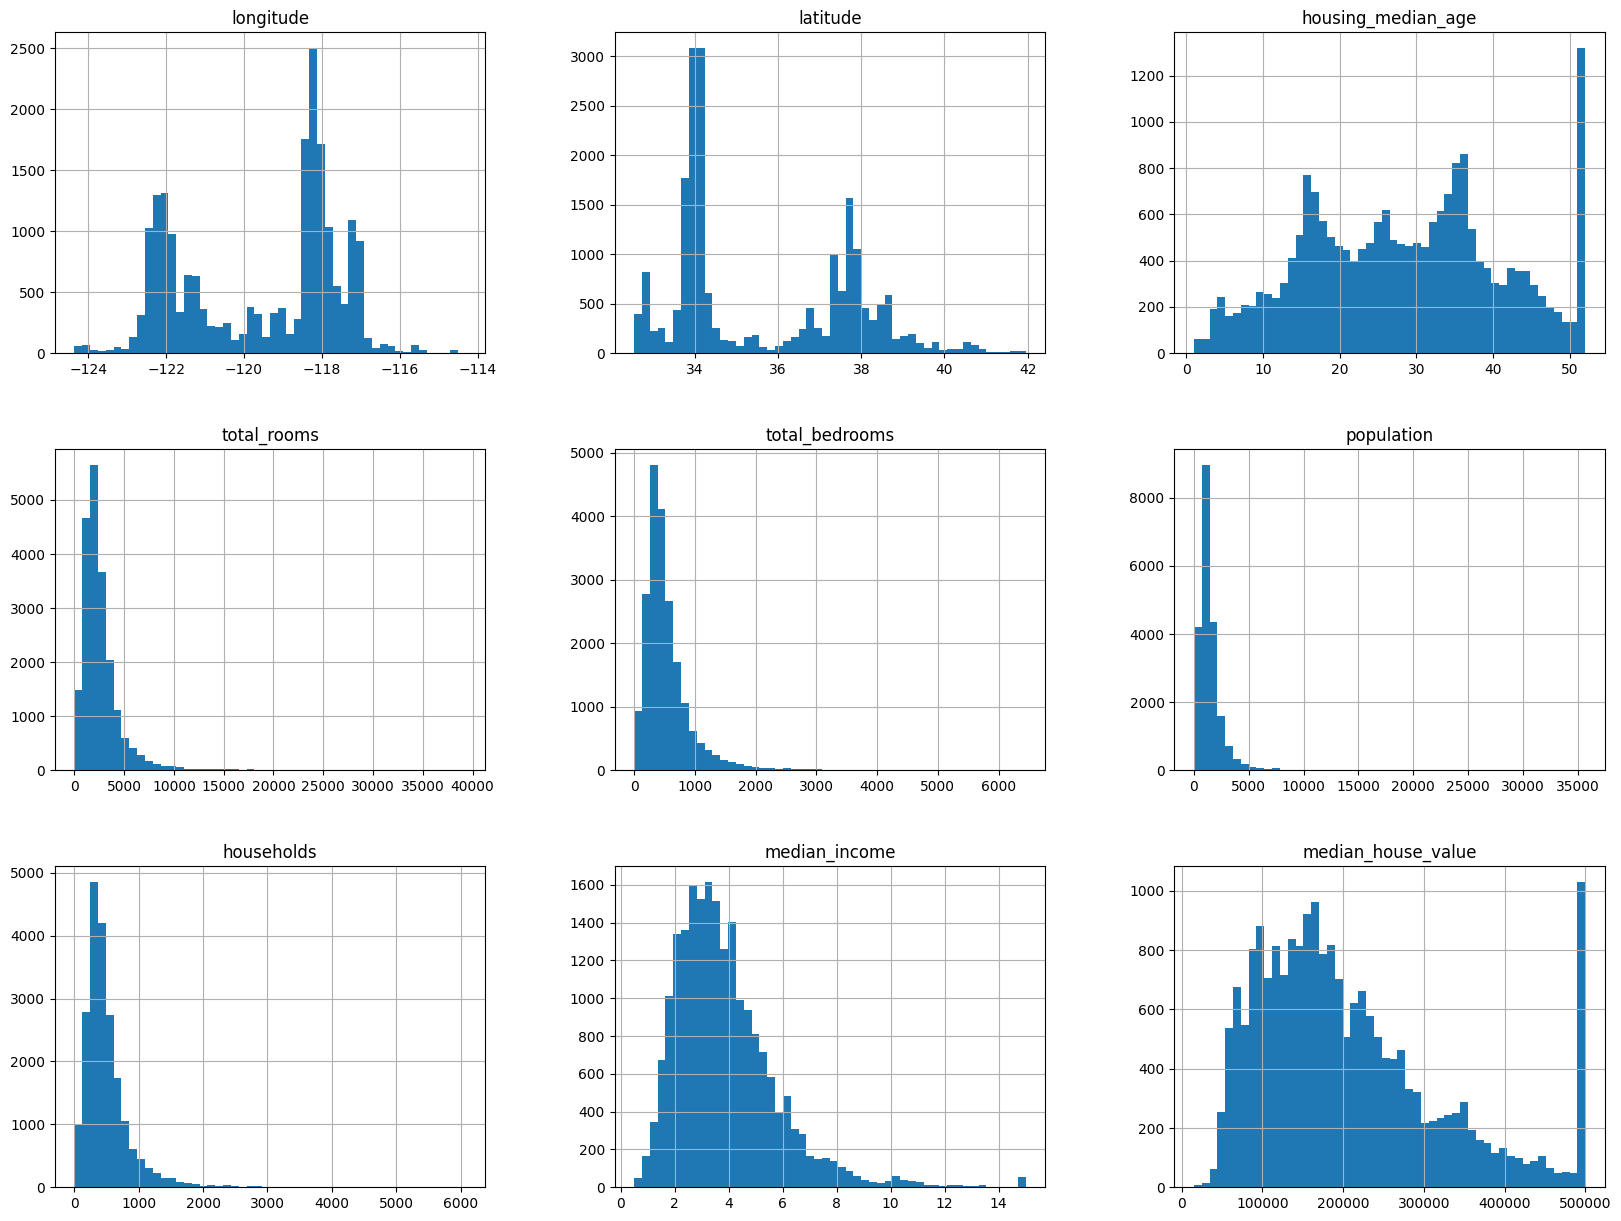

In [9]:
# Visualize using a histogram
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Exploratory Data Analysis

<Axes: title={'center': 'Longitude & Latitude Visualization'}, xlabel='longitude', ylabel='latitude'>

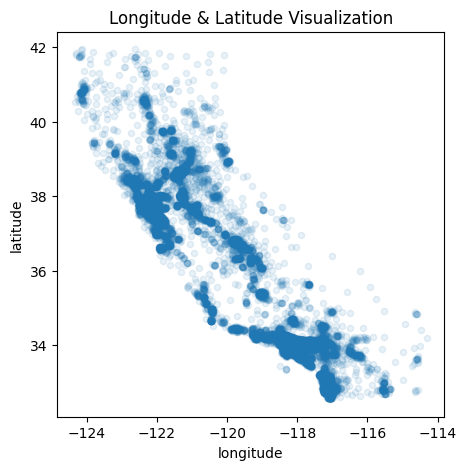

In [10]:
# Scatter plot to visualize the latitudes and longitudes 
# Alpha parameter visualizes the places where there is a highdensity of data points

housing.plot(kind='scatter', x = 'longitude', y = 'latitude', title='Longitude & Latitude Visualization', alpha=0.1, figsize=(5,5))

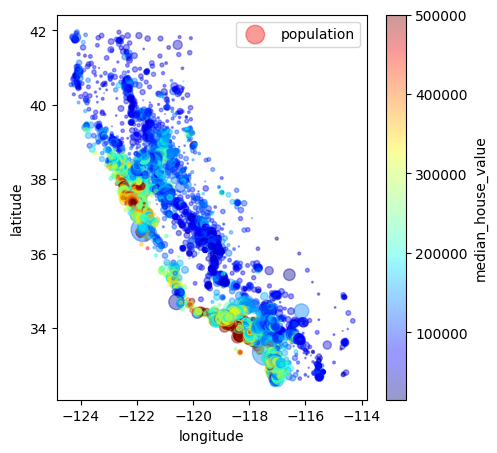

In [11]:
# Scatter plot to show detailed visuals of the population
housing.plot(kind="scatter", 
             x="longitude",
             y="latitude",
             alpha=0.4,s=housing["population"]/100, 
             label="population", 
             figsize=(5,5),
             c="median_house_value", 
             cmap=plt.get_cmap("jet"), 
             colorbar=True)

plt.legend()

##### This shows that the locations are closely related to the population. It would be useful to use a clustering algorithm to detect the main clusters.

In [12]:
# Check for any correlation in the data using Pearson's r 
corr_matrix = housing.corr(method='pearson', numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

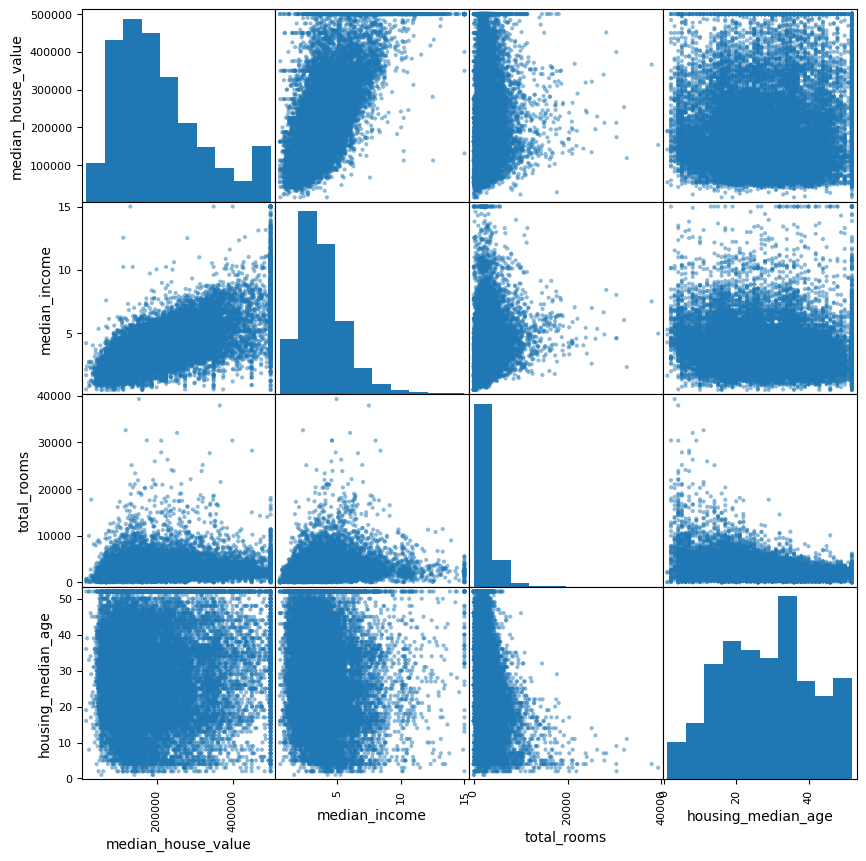

In [13]:
# Check for correlation using scatter matrix
from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(10,10) )

#### The best possitive correlation is between the median_house_value and the median income. Let's visualize the correlation properly

<Axes: xlabel='median_income', ylabel='median_house_value'>

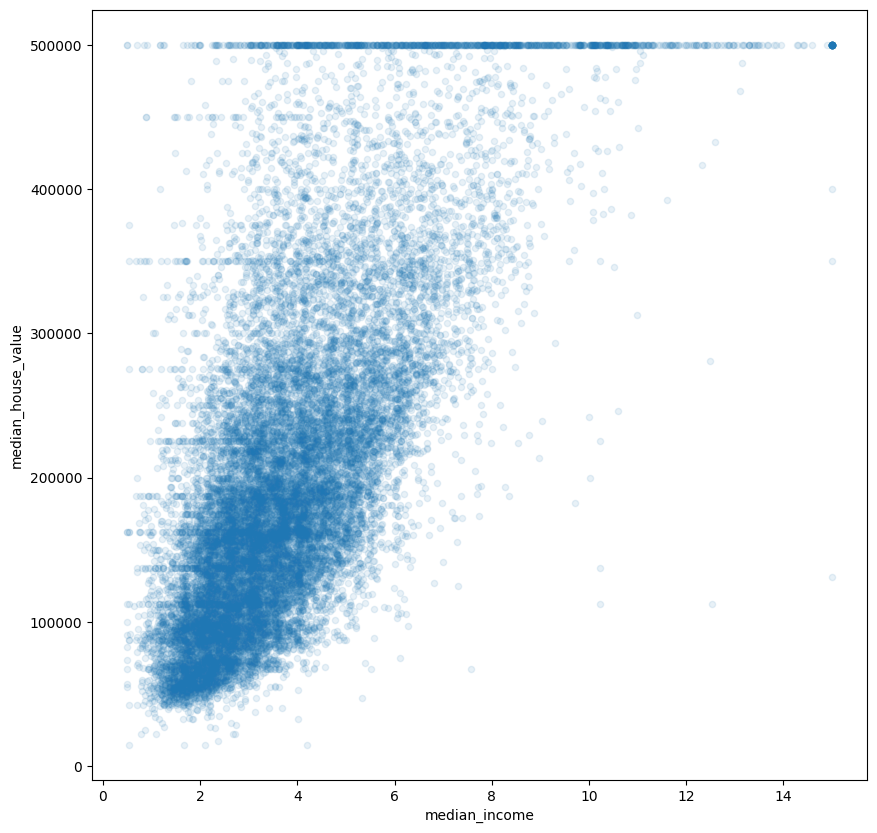

In [14]:
# Scatter plot for correlation between median_house_value and median_income
housing.plot(kind='scatter', x = 'median_income', y = 'median_house_value', alpha=0.1, figsize=(10,10))

## Verifying Data Quality

In [15]:
# Checking for missing values
housing.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

longitude


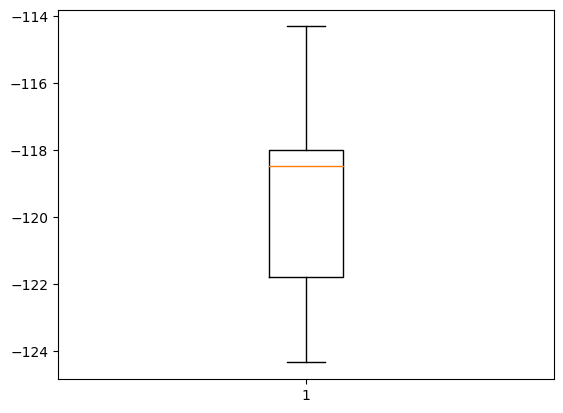

latitude


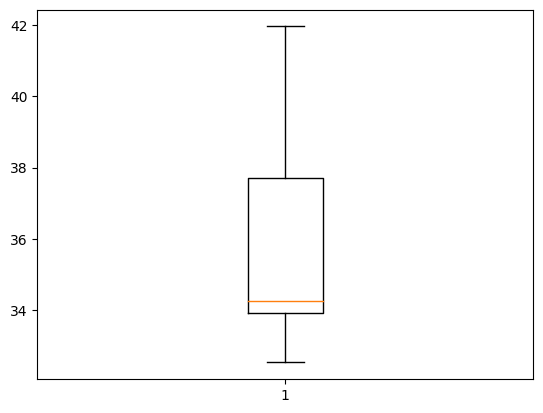

housing_median_age


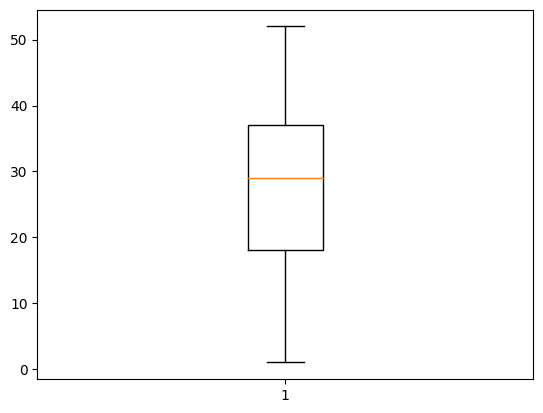

total_rooms


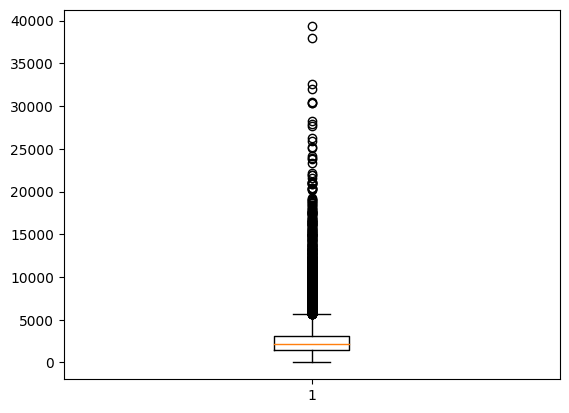

total_bedrooms


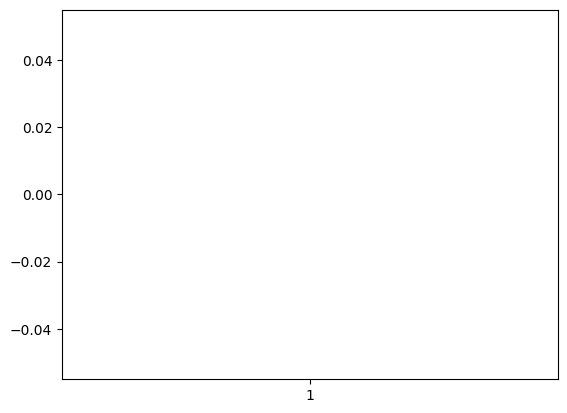

population


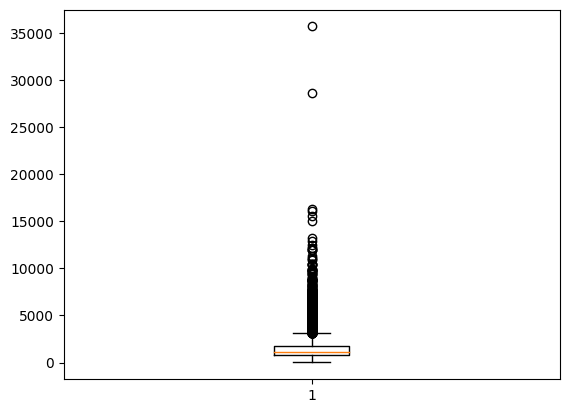

households


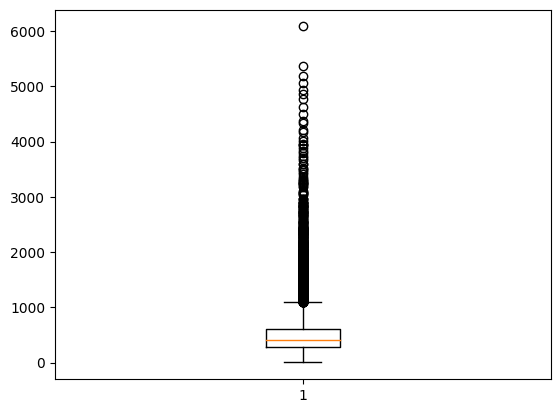

median_income


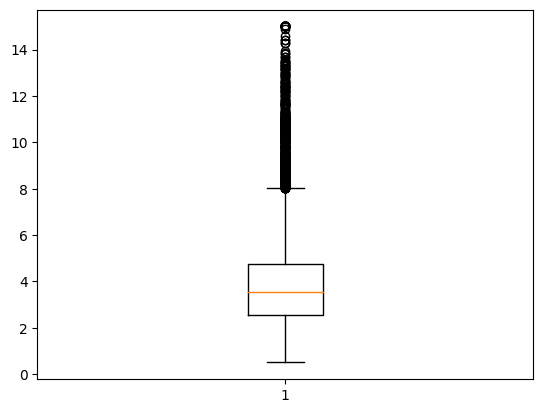

median_house_value


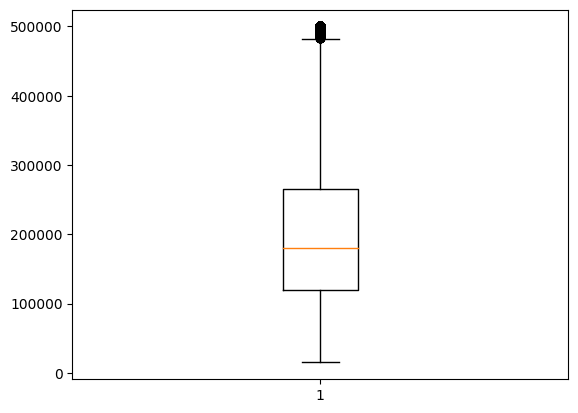

In [17]:
# Check the presence of outliers using boxplots
col_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', ]

for col in col_names:
    print(col)
    plt.boxplot(housing[col])
    plt.show()


#### From this output we see that all features except longitude, latitude and housing_median_age have outliers.

## 2. Data Preparation

In [18]:
# Splitting the data to training and testing data
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing, test_size=0.2, random_state=42)

In [19]:
print('Training set shape:',train.shape)
print('Testing set shape:',test.shape)


Training set shape: (16512, 10)
Testing set shape: (4128, 10)


In [20]:
# Handling missing values by using an imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')


In [21]:
# Removing the categorical data from the set
train_num= train.drop('ocean_proximity', axis=1)
train_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


In [22]:
# Fit the impute instance to the training set
imputer.fit(train_num)

SimpleImputer(strategy='median')

In [23]:
# Check for the statistics
imputer.statistics_

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1670e+03,  4.1000e+02,  3.5458e+00,  1.7985e+05])

In [24]:
# Using the imputer to transform the training set by replacing missing values by the learned medians.
X = imputer.transform(train_num)

# Converting X into a DataFrame
train_transform = pd.DataFrame(X, columns=train_num.columns)


### Handling Categorical Features

In [25]:
# One hot encoding the ocen_proximity column
train_cat = train[['ocean_proximity']]
train_cat.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
17848,<1H OCEAN
6252,<1H OCEAN
9389,NEAR BAY
6113,<1H OCEAN
6061,<1H OCEAN


In [26]:
# Performing One hot encoding 
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
train_cat_1hot = cat_encoder.fit_transform(train_cat)
train_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [27]:
# Converting the train_cat_1hot to an array
train_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [28]:
# Check the categories
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Feature Engineering

In [29]:
# Create new features from the data
train["rooms_per_household"] = train["total_rooms"]/train["households"]
train["bedrooms_per_room"] = train["total_bedrooms"]/train["total_rooms"]
train["population_per_household"] = train["population"]/train["households"]

train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,6.395349,0.166993,3.178891


In [30]:
# Check the confusion matrix including the new features
corr_matrix=train.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

### Feature Scaling

In [31]:
# Spliting the data into inputs and output
train_labels = train['median_house_value'].copy()

In [32]:
# Drop the label from the training set
train = train.drop('median_house_value', axis=1)
train_num = train.drop( 'ocean_proximity', axis=1)

In [33]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,6.268421,0.180940,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN,6.395349,0.166993,3.178891


In [34]:
train_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,6.268421,0.180940,2.300000
...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,6.395349,0.166993,3.178891


In [35]:
train_labels.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

In [36]:
# Creating a transformation pipeline for the numeric and categorical columns separately.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('ímputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())])
train_num_tr=num_pipeline.fit_transform(train_num)

In [37]:
# Creating a Column Transformer that transforms both the numeric and categorical columns at once.
from sklearn.compose import ColumnTransformer

num_attribs=list(train_num)
cat_attribs=["ocean_proximity"]

In [38]:
full_pipeline=ColumnTransformer([("num", num_pipeline, num_attribs), ("cat",OneHotEncoder(), cat_attribs) ])

train_prepared=full_pipeline.fit_transform(train)

## 4. Modelling

##### We are going to train three different models and compare their performance on the training set. The overall goal is to train a model that performs well on test set. But analyzing theperformance of a model on the training set is also important; it gives you a first glance on theoverall performance. A model that does not perform well on training set, cannot perform well onthe test set either.

### 4.1 Linear Regression

In [39]:
train_prepared.shape

(16512, 16)

In [40]:
train_labels.shape

(16512,)

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [42]:
# Testing the Predictions using random data in the training set
some_data = train.iloc[:5]
some_labels = train_labels.iloc[:5]

# Preparing the Data
some_data_prepared = full_pipeline.transform(some_data)

# Making the predictions 
print("Predictions:", lin_reg.predict(some_data_prepared))
print()
print("Labels:", list(some_labels))


Predictions: [181746.54359616 290558.74973505 244957.50017771 146498.51061398
 163230.42393939]

Labels: [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [43]:
# Measuring the model's RMSE(Root Mean Square Error)
from sklearn.metrics import mean_squared_error

train_prediction = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_labels, train_prediction)
lin_rmse = np.sqrt(lin_mse)

print('RMSE:',lin_rmse)


RMSE: 67593.20745775253


#### 4.2 Decision Tree Model

In [44]:
# Trainin the model using a Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor()

In [45]:
# Evaluating the model
train_predictions = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
print('Decision Tree RMSE:', tree_rmse)


Decision Tree RMSE: 0.0


In [46]:
# Evaluation using Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# Check the scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [66189.86792384 70807.64377007 68696.9190663  70017.53615279
 72066.15403083 67068.10663411 65424.89038342 68002.90430994
 67528.6798872  71070.37725038]
Mean: 68687.30794088637
Standard deviation: 2113.6286064048604


##### The Decision Tree model here above is a perfect example of overfitting. On the trainingset, the model performed perfectly, while on the validation sets, it did not. This can be generalized,that is, if a model performs better on the training set than on the validation sets, that is, withCross-Validation, then the model is probably overfitting.

In [47]:
# Same scores for the Linear Regression mode
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [65000.67382615 70960.56056304 67122.63935124 66090.43933174
 68402.54686442 65266.34735288 65218.78174481 68525.46981754
 72739.87555996 68957.34111906]
Mean: 67828.46755308326
Standard deviation: 2468.0344977794093


#### 4.3 Random Forest Model


In [48]:
# Random Forest Model 
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_labels)
train_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse= np.sqrt(tree_mse)

print('Random Forest RMSE:', forest_rmse)
forest_rmse

Random Forest RMSE: 0.0


0.0

In [49]:
# Evaluating the Random Forest Model
forest_scores = cross_val_score(forest_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [47103.99711873 51505.75177009 49828.64785785 52013.63951151
 52596.80320039 46722.67538931 47446.8766829  50736.14159312
 49263.18680819 50068.39217226]
Mean: 49728.61121043541
Standard deviation: 1977.216875333806


#### Fine tuning the model

In [50]:
# Using Grid Search
# Hyper parameter tuning using the Rando Forest Regressor
from sklearn.model_selection import GridSearchCV

param_grid = [ {'n_estimators': [3,10,30],'max_features': [2,4,6,8]},{'bootstrap': [False],'n_estimators': [3,10],'max_features': [2,3,4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [51]:
grid_search.best_params_# our result {'max_features': 8, 'n_estimators': 30}

#Since 8 and 30 are the maximum values that were evaluated, you should probably try searching again with higher values, since the score may continue to improve.

{'max_features': 6, 'n_estimators': 30}

In [52]:
# Gettin the estimator directly
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [53]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63435.7384531919 {'max_features': 2, 'n_estimators': 3}
55399.70146070464 {'max_features': 2, 'n_estimators': 10}
52526.6507187623 {'max_features': 2, 'n_estimators': 30}
60209.58837909213 {'max_features': 4, 'n_estimators': 3}
52499.025984176194 {'max_features': 4, 'n_estimators': 10}
50486.68693030927 {'max_features': 4, 'n_estimators': 30}
58076.924176959554 {'max_features': 6, 'n_estimators': 3}
51493.905080949175 {'max_features': 6, 'n_estimators': 10}
49848.501894790366 {'max_features': 6, 'n_estimators': 30}
58587.818725069425 {'max_features': 8, 'n_estimators': 3}
52130.048720410516 {'max_features': 8, 'n_estimators': 10}
50000.17367581833 {'max_features': 8, 'n_estimators': 30}
61837.955898621236 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53860.914233951466 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59695.86466529206 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52272.01777023155 {'bootstrap': False, 'max_features': 3, 'n_estimator

#### Saving the model


In [54]:
import pickle 
#import joblib

filename ='forest_housing_model.pkl'
#joblib.dump(grid_search.best_estimator_,filename)

filename='random_forest_housing_model.sav'
pickle.dump(grid_search.best_estimator_,open(filename,'wb'))

In [55]:
#Reloading the model

#model=pickle.load(open(filename,'rb'))38